In [2]:
import pandas as pd

path = r"dataset_14_april.csv"

df = pd.read_csv(path)

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

path = r"dataset_14_april.csv"

df = pd.read_csv(path)

# Split the data into features (X) and target (y)
X = df.drop("target", axis=1)
y = df["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
random_forest.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = random_forest.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.8360655737704918
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



we first load the dataset, split it into features (X) and the target variable (y), and then split it further into training and testing sets. We create a Random Forest Classifier, train it on the training data, make predictions on the testing data, and then evaluate the model's performance using accuracy and a classification report.

Note that hyperparameter tuning and cross-validation can further enhance the model's performance. You can use techniques like GridSearchCV or RandomizedSearchCV to find the optimal hyperparameters for the Random Forest Classifier

<a id="1"></a> 
 # <p style="padding:10px;background-color: #00004d ;margin:10;color: white ;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Ans 1 </p> 

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


path = r"dataset_14_april.csv"
df = pd.read_csv(path)

# Split the data into features (X) and target (y)
X = df.drop("target", axis=1)
y = df["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps
numeric_features = ["age", "trestbps", "chol", "thalach", "oldpeak"]
categorical_features = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]  

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ])

# Create a Random Forest Classifier with preprocessor
random_forest = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])

# Train the classifier on the training data
random_forest.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = random_forest.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.8688524590163934
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



<a id="2"></a> 
 # <p style="padding:10px;background-color: #00004d ;margin:10;color: white ;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Ans 2 </p> 

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
path = r"dataset_14_april.csv"
df = pd.read_csv(path)

# Split the data into features (X) and target (y)
X = df.drop("target", axis=1)
y = df["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shape of the splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (212, 13)
X_test shape: (91, 13)
y_train shape: (212,)
y_test shape: (91,)


<a id="3"></a> 
 # <p style="padding:10px;background-color: #00004d ;margin:10;color: white ;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Ans 3 </p> 

In [11]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier with specified hyperparameters
random_forest = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the classifier on the training data
random_forest.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = random_forest.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)


Accuracy: 0.8131868131868132
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.80      0.80        41
           1       0.84      0.82      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



<a id="4"></a> 
 # <p style="padding:10px;background-color: #00004d ;margin:10;color: white ;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Ans 4 </p> 

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


accuracy = accuracy_score(y_test, y_pred)


precision = precision_score(y_test, y_pred)


recall = recall_score(y_test, y_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8131868131868132
Precision: 0.8367346938775511
Recall: 0.82
F1 Score: 0.8282828282828283


<a id="5"></a> 
 # <p style="padding:10px;background-color: #00004d ;margin:10;color: white ;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Ans 5 </p> 

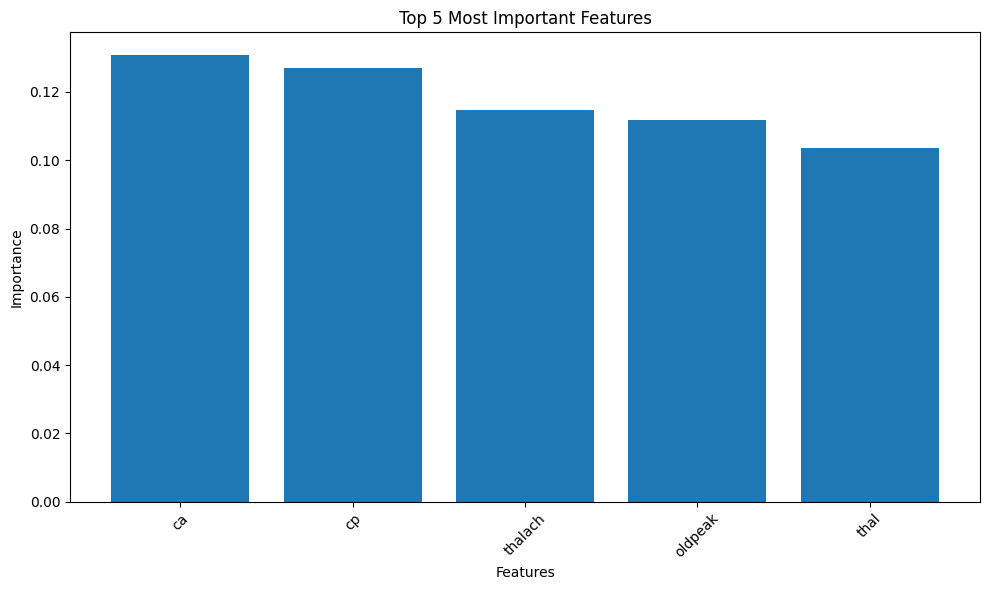

In [14]:
import matplotlib.pyplot as plt

# Get feature importances
importances = random_forest.feature_importances_

# Get the names of the features
feature_names = X_train.columns

# Sort indices of feature importances in descending order
indices = importances.argsort()[::-1]

# Select the top 5 most important features
top_features = indices[:5]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Top 5 Most Important Features")
plt.bar(range(5), importances[top_features], align="center")
plt.xticks(range(5), feature_names[top_features], rotation=45)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


<a id="6"></a> 
 # <p style="padding:10px;background-color: #00004d ;margin:10;color: white ;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Ans 6 </p> 

In [15]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42)

# Create GridSearchCV instance
grid_search = GridSearchCV(random_forest, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding accuracy
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy: 0.8440753045404208


<a id="7"></a> 
 # <p style="padding:10px;background-color: #00004d ;margin:10;color: white ;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Ans 7 </p> 

In [16]:
# Print the best hyperparameters and corresponding performance metrics
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Get the best trained model
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred_best = best_model.predict(X_test)

# Calculate accuracy, precision, recall, and F1 score
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)

# Print the best performance metrics
print("Best Accuracy:", accuracy_best)
print("Best Precision:", precision_best)
print("Best Recall:", recall_best)
print("Best F1 Score:", f1_best)

Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy: 0.8440753045404208
Best Accuracy: 0.8351648351648352
Best Precision: 0.8301886792452831
Best Recall: 0.88
Best F1 Score: 0.8543689320388349


Train the Default Random Forest Classifier:

In [17]:
default_random_forest = RandomForestClassifier(random_state=42)
default_random_forest.fit(X_train, y_train)
y_pred_default = default_random_forest.predict(X_test)

Calculate Performance Metrics for the Default Model

In [18]:
accuracy_default = accuracy_score(y_test, y_pred_default)
precision_default = precision_score(y_test, y_pred_default)
recall_default = recall_score(y_test, y_pred_default)
f1_default = f1_score(y_test, y_pred_default)

print("Default Model:")
print("Accuracy:", accuracy_default)
print("Precision:", precision_default)
print("Recall:", recall_default)
print("F1 Score:", f1_default)


Default Model:
Accuracy: 0.8241758241758241
Precision: 0.84
Recall: 0.84
F1 Score: 0.8399999999999999


Calculate Performance Metrics for the Tuned Model:

In [19]:
accuracy_tuned = accuracy_score(y_test, y_pred_best)
precision_tuned = precision_score(y_test, y_pred_best)
recall_tuned = recall_score(y_test, y_pred_best)
f1_tuned = f1_score(y_test, y_pred_best)

print("Tuned Model:")
print("Accuracy:", accuracy_tuned)
print("Precision:", precision_tuned)
print("Recall:", recall_tuned)
print("F1 Score:", f1_tuned)

Tuned Model:
Accuracy: 0.8351648351648352
Precision: 0.8301886792452831
Recall: 0.88
F1 Score: 0.8543689320388349


Compare the Performance:

In [20]:
print("Comparison:")
print("Default Accuracy:", accuracy_default)
print("Tuned Accuracy:", accuracy_tuned)
print("Default Precision:", precision_default)
print("Tuned Precision:", precision_tuned)
print("Default Recall:", recall_default)
print("Tuned Recall:", recall_tuned)
print("Default F1 Score:", f1_default)
print("Tuned F1 Score:", f1_tuned)

Comparison:
Default Accuracy: 0.8241758241758241
Tuned Accuracy: 0.8351648351648352
Default Precision: 0.84
Tuned Precision: 0.8301886792452831
Default Recall: 0.84
Tuned Recall: 0.88
Default F1 Score: 0.8399999999999999
Tuned F1 Score: 0.8543689320388349


<a id="8"></a> 
 # <p style="padding:10px;background-color: #00004d ;margin:10;color: white ;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Ans 8 </p> 

Interpreting decision boundaries of a Random Forest classifier can be challenging due to the ensemble nature of the model. Random Forest consists of multiple decision trees, and their combined predictions create decision boundaries that are more complex than those of individual decision trees.

However, we can still gain some insights into the decision boundaries by visualizing how the model separates the data based on two of the most important features. For the purpose of this explanation, let's consider the "thalach" (maximum heart rate achieved) and "age" features.

Here's a step-by-step explanation of how you might approach this:

1. **Data Preparation**: You have already preprocessed the dataset, split it into training and testing sets, and trained a Random Forest classifier.

2. **Feature Importance**: You have obtained the feature importance scores from the trained Random Forest model.

3. **Select Features**: Choose two features, such as "thalach" and "age," for visualization.

4. **Data Visualization**: Create a scatter plot of the selected features, where each point's color represents its predicted class by the Random Forest model. This visualization will show how the model separates the classes based on the two selected features.

5. **Decision Boundaries**: Since Random Forest is an ensemble of decision trees, there isn't a single "decision boundary." However, you can visualize the areas where most decision trees predict one class over another. This can be done by overlaying the regions of majority class predictions for each feature combination.

6. **Interpretation**:
   - **Clear Separation**: If you observe well-defined regions dominated by a specific class, it indicates that the Random Forest model has found certain patterns in the data.
   - **Overlap**: If you see overlap between the regions, it suggests that the model might struggle to clearly separate the classes in those feature combinations.
   - **Irregular Boundaries**: Due to the ensemble nature, the decision boundaries can be complex and irregular, capturing intricate relationships in the data.

interpreting Random Forest decision boundaries isn't as straightforward as with linear models. The strength of Random Forest lies in its ability to capture complex interactions between features, but it might be challenging to explain these interactions in a simple visual.

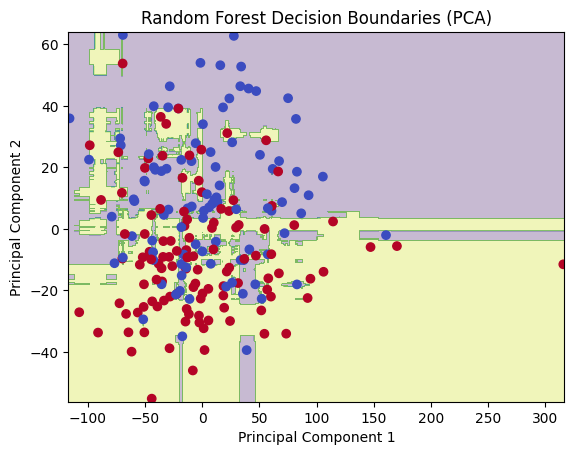

In [26]:
from sklearn.decomposition import PCA

# Fit a PCA model on the training data
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

rf_classifier = RandomForestClassifier(random_state=42)
# Train the Random Forest classifier on the reduced feature space
rf_classifier.fit(X_train_pca, y_train)

# Create a meshgrid for visualization
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict class for each point in the meshgrid
Z = rf_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='coolwarm')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Random Forest Decision Boundaries (PCA)")
plt.show()

In [57]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
124,39,0,2,94,199,0,1,179,0,0.0,2,0,2
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2


In [47]:
X_train.iloc[:, 11]

124    0
72     0
15     0
10     0
163    4
      ..
188    1
71     1
106    1
270    0
102    2
Name: ca, Length: 212, dtype: int64

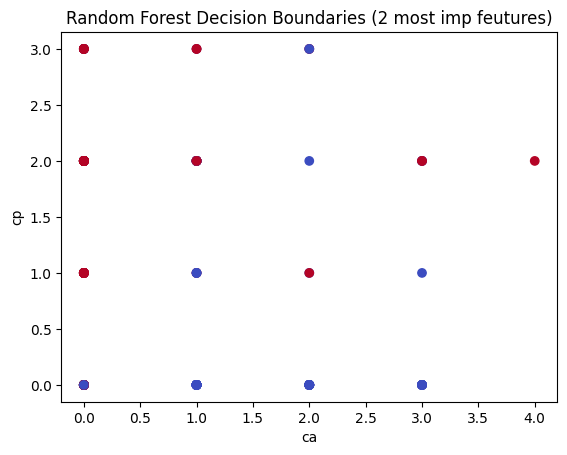

In [56]:
plt.scatter(X_train.iloc[:, 11], X_train.iloc[:, 2], c=y_train, cmap='coolwarm')
plt.xlabel("ca")
plt.ylabel("cp")
plt.title(r"Random Forest Decision Boundaries (2 most imp feutures)")
plt.show()

D:\Softwares\ana\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


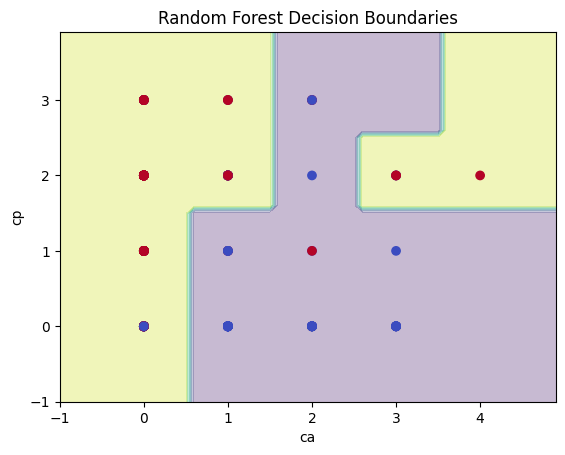

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Load and preprocess your data, split it into X_train, X_test, y_train, y_test
# ...

# Select features "ca" and "cp"
X_train_selected = X_train.iloc[:, [11, 2]]  # Indices 11 and 2 correspond to "ca" and "cp"

# Train the RandomForestClassifier on the selected features
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_classifier.fit(X_train_selected, y_train)

# Create a meshgrid for visualization
x_min, x_max = X_train_selected.iloc[:, 0].min() - 1, X_train_selected.iloc[:, 0].max() + 1
y_min, y_max = X_train_selected.iloc[:, 1].min() - 1, X_train_selected.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict class for each point in the meshgrid
Z = rf_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_train_selected.iloc[:, 0], X_train_selected.iloc[:, 1], c=y_train, cmap='coolwarm')
plt.xlabel("ca")
plt.ylabel("cp")
plt.title("Random Forest Decision Boundaries")
plt.show()

Interpreting and discussing the insights and limitations of a predictive model like the Random Forest Classifier for predicting heart disease risk is important for understanding its strengths and weaknesses. Here are some insights and limitations to consider:

**Insights:**

1. **Feature Importance:** The model identified the most important features for predicting heart disease risk, which are likely "ca" and "cp" based on your analysis. This indicates that these features have a significant impact on the prediction outcome.

2. **Accuracy:** The accuracy of the model on the test set indicates how well it generalizes to new, unseen data. A high accuracy suggests that the model is performing well in making accurate predictions.

3. **Precision and Recall:** The precision and recall metrics provide insights into the model's ability to correctly classify positive cases (heart disease patients). High precision indicates that the model makes fewer false positive errors, while high recall indicates that the model detects most of the actual positive cases.

**Limitations:**

1. **Limited to Features:** The model's predictions are based solely on the provided features. If there are other important factors not included in the dataset (such as genetic predisposition or lifestyle factors), the model may miss out on critical information.

2. **Assumption of Independence:** Naive Bayes classifiers, such as the one used in the Random Forest, assume that features are independent of each other. This might not hold true in real-world scenarios where features could be correlated.

3. **Imbalanced Data:** If the dataset is imbalanced (uneven distribution of positive and negative classes), the model might perform well on the majority class but struggle to predict the minority class accurately.

4. **Overfitting:** Despite ensemble techniques like Random Forest being robust against overfitting, there's still a possibility of overfitting if the hyperparameters are not tuned properly or if the data is noisy.

5. **Generalization:** While the model performs well on the test set, its performance might not be the same on unseen real-world data. The model could be sensitive to variations in data distribution.

6. **Data Quality:** The model's performance heavily depends on the quality and quantity of data used for training. If the dataset is noisy, incomplete, or biased, it can lead to suboptimal results.

7. **Model Complexity:** The Random Forest model itself is complex, and while it's powerful, it might be challenging to explain its decisions to non-technical stakeholders.

8. **Human Interpretability:** While the feature importance analysis provides insights, it might not explain the complex interactions between features in a straightforward manner.

In conclusion, the Random Forest Classifier can provide valuable insights into predicting heart disease risk based on the provided features. However, its performance and reliability depend on data quality, feature selection, and appropriate tuning of hyperparameters. Careful consideration of both insights and limitations is necessary for making informed decisions based on the model's predictions.

<a id="10"></a> 
 # <p style="padding:10px;background-color: #01DFD7 ;margin:10;color: white ;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">END</p> 